In [8]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import Image

##  1.그림 3-10(b)의 퍼셉트론에 그림 3-8(a)에 있는 샘플 4개를 입력하여 예측 결과를 계산하시오

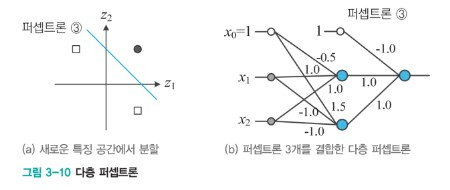

In [5]:
Image('/imbdx/rnd/ALScreen/dev/jyj/03.Playground/tmp/Image/fig_3-10.jpg')

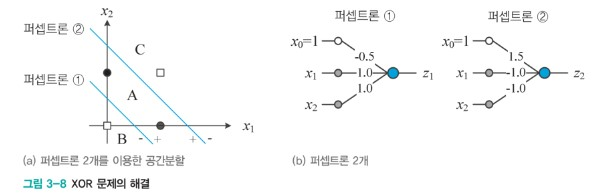

In [7]:

Image('/imbdx/rnd/ALScreen/dev/jyj/03.Playground/tmp/Image/fig_3-8.jpg')

In [39]:
for sample in [[0,0],[1,1],[0,1],[1,0]]:
    bias= 1
    x1 = sample[0]
    x2 = sample[1]
    x  = [1,x1,x2]
    U1 = np.array([[-0.5,1.5],[1,-1],[1,-1]])
    U2 = np.array([[-1,1,1]])

    res1 = list(np.dot(x,U1))
    res1 = np.array([bias]+res1)
    res2 = list(np.dot(res1,U2.T))
    print(sample,">",str(int(res2[0])))

[0, 0] > 0
[1, 1] > 0
[0, 1] > 0
[1, 0] > 0


## 2.NOR게이트와 AND게이트의 동작을 데이터로 간주하면 다음과 같다. 
## 이들을 100% 옳게 분류하는 퍼셉트론을 각각 제시하시오. 
### NOR분류 {x1=(0,0)^T, y1=1), x2 = (1,0)^T, Y2=-1, x3=(0,1)^T,y3=-1, x4=(1,1)^T, y=-1) } 
### AND분류 {x1=(0,0)^T, y1=-1), x2 = (1,0)^T, Y2=-1, x3=(0,1)^T,y3=-1, x4=(1,1)^T, y=1) }

In [91]:
def nor_perceptron(x1, x2):
    # 가중치와 편향 설정 (학습된 값)
    w = np.array([0.5,0.5])
    bias = (-0.5)
    z = (np.dot(np.array([x1,x2]),w.T)) + bias
    if z >= 0:
        return 1
    else:
        return 0

# AND 게이트 동작 테스트
print(nor_perceptron(0, 0))  # Output: 0
print(nor_perceptron(1, 0))  # Output: 0
print(nor_perceptron(0, 1))  # Output: 0
print(nor_perceptron(1, 1))  # Output: 1


0
1
1
1


In [76]:
def and_perceptron(x1, x2):
    # 가중치와 편향 설정 (학습된 값)
    w = np.array([0.5,0.5])
    bias = -0.7
    
    z = (np.dot(np.array([x1,x2]),w.T)) + bias
    
    if z >= 0:
        return 1
    else:
        return 0

# AND 게이트 동작 테스트
print(and_perceptron(0, 0))  # Output: 0
print(and_perceptron(1, 0))  # Output: 0
print(and_perceptron(0, 1))  # Output: 0
print(and_perceptron(1, 1))  # Output: 1


0
0
0
1


## 3. 3.4절의 오류 역전파 대신 식 2.51을 사용하여 그레디언트를 근사 계산할 수 있다. 식 2.51을 사용하는 방법의 계산 효율을 분석하시오.

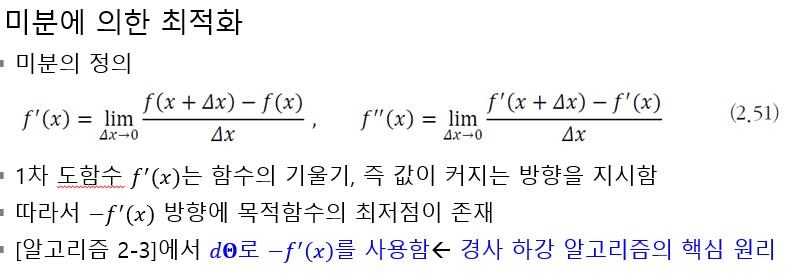

In [4]:
Image('/imbdx/rnd/ALScreen/dev/jyj/03.Playground/tmp/Image/exp_2.51.jpg')

In [19]:
import time

## 오류 역전파를 이용한 방법

In [20]:


import numpy as np

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 다층 퍼셉트론 클래스 정의
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 가중치 초기화
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
    
    def forward(self, X):
        # 입력부터 출력까지의 순방향 전달
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return self.output
    
    def backward(self, X, y, learning_rate):
        # 역전파 수행
        error = self.output - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0)
        
        hidden_error = np.dot(error, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.hidden_output * (1 - self.hidden_output)
        d_weights_input_hidden = np.dot(X.reshape(-1, 1), hidden_delta.reshape(1, -1))
        d_bias_hidden = np.sum(hidden_delta, axis=0)
        
        # 가중치 업데이트
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                input_data = X[i]
                target = y[i]
                
                output = self.forward(input_data)
                loss = np.mean((output - target) ** 2)
                total_loss += loss
                
                self.backward(input_data, target, learning_rate)
            
            avg_loss = total_loss / len(X)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# 데이터 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# 학습 시간 측정 시작
start_time = time.time()
# MLP 모델 생성 및 학습
input_size = X.shape[1]
hidden_size = 4
output_size = y.shape[1]
mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X, y, epochs=10000, learning_rate=0.1)

# 학습된 모델을 사용하여 예측 수행
for i in range(len(X)):
    input_data = X[i]
    prediction = mlp.forward(input_data)
    print(f"Input: {input_data}, Prediction: {prediction}")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training took {elapsed_time:.4f} seconds")

Epoch 1/10000, Loss: 1.4856
Epoch 2/10000, Loss: 0.5341
Epoch 3/10000, Loss: 0.4701
Epoch 4/10000, Loss: 0.4582
Epoch 5/10000, Loss: 0.4500
Epoch 6/10000, Loss: 0.4425
Epoch 7/10000, Loss: 0.4355
Epoch 8/10000, Loss: 0.4289
Epoch 9/10000, Loss: 0.4227
Epoch 10/10000, Loss: 0.4169
Epoch 11/10000, Loss: 0.4114
Epoch 12/10000, Loss: 0.4063
Epoch 13/10000, Loss: 0.4015
Epoch 14/10000, Loss: 0.3969
Epoch 15/10000, Loss: 0.3926
Epoch 16/10000, Loss: 0.3885
Epoch 17/10000, Loss: 0.3847
Epoch 18/10000, Loss: 0.3811
Epoch 19/10000, Loss: 0.3776
Epoch 20/10000, Loss: 0.3744
Epoch 21/10000, Loss: 0.3713
Epoch 22/10000, Loss: 0.3683
Epoch 23/10000, Loss: 0.3655
Epoch 24/10000, Loss: 0.3629
Epoch 25/10000, Loss: 0.3603
Epoch 26/10000, Loss: 0.3579
Epoch 27/10000, Loss: 0.3556
Epoch 28/10000, Loss: 0.3534
Epoch 29/10000, Loss: 0.3513
Epoch 30/10000, Loss: 0.3493
Epoch 31/10000, Loss: 0.3474
Epoch 32/10000, Loss: 0.3455
Epoch 33/10000, Loss: 0.3438
Epoch 34/10000, Loss: 0.3421
Epoch 35/10000, Loss: 0

## 미니배치 확률적 경사 하강법 (미분을 사용하여 그레디언트를 근사 계산)

In [21]:


# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 다층 퍼셉트론 클래스 정의
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 가중치 초기화
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
    
    def forward(self, X):
        # 입력부터 출력까지의 순방향 전달
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        return self.output
    
    def backward(self, X, y, learning_rate):
        # 역전파 수행
        error = self.output - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0)
        
        hidden_error = np.dot(error, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.hidden_output * (1 - self.hidden_output)
        d_weights_input_hidden = np.dot(X.reshape(-1, 1), hidden_delta.reshape(1, -1))
        d_bias_hidden = np.sum(hidden_delta, axis=0)
        
        # 가중치 업데이트
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden
    
    def train(self, X, y, epochs, learning_rate, batch_size):
        num_samples = len(X)
        for epoch in range(epochs):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            
            total_loss = 0
            for start_idx in range(0, num_samples, batch_size):
                end_idx = min(start_idx + batch_size, num_samples)
                batch_indices = indices[start_idx:end_idx]
                
                batch_X = X[batch_indices]
                batch_y = y[batch_indices]
                
                for i in range(len(batch_X)):
                    input_data = batch_X[i]
                    target = batch_y[i]

                    output = self.forward(input_data)
                    loss = np.mean((output - target) ** 2)
                    total_loss += loss

                    self.backward(input_data, target, learning_rate)
            
            avg_loss = total_loss / num_samples
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# 데이터 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# 학습 시간 측정 시작
start_time = time.time()
# MLP 모델 생성 및 학습
input_size = X.shape[1]
hidden_size = 4
output_size = y.shape[1]
mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X, y, epochs=10000, learning_rate=0.1, batch_size=2)

# 학습된 모델을 사용하여 예측 수행
for i in range(len(X)):
    input_data = X[i]
    prediction = mlp.forward(input_data)
    print(f"Input: {input_data}, Prediction: {prediction}")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training took {elapsed_time:.4f} seconds")

Epoch 1/10000, Loss: 1.1785
Epoch 2/10000, Loss: 0.4264
Epoch 3/10000, Loss: 0.3508
Epoch 4/10000, Loss: 0.3190
Epoch 5/10000, Loss: 0.3094
Epoch 6/10000, Loss: 0.3004
Epoch 7/10000, Loss: 0.2788
Epoch 8/10000, Loss: 0.2918
Epoch 9/10000, Loss: 0.2786
Epoch 10/10000, Loss: 0.2801
Epoch 11/10000, Loss: 0.2767
Epoch 12/10000, Loss: 0.2751
Epoch 13/10000, Loss: 0.2582
Epoch 14/10000, Loss: 0.2695
Epoch 15/10000, Loss: 0.2592
Epoch 16/10000, Loss: 0.2674
Epoch 17/10000, Loss: 0.2569
Epoch 18/10000, Loss: 0.2527
Epoch 19/10000, Loss: 0.2543
Epoch 20/10000, Loss: 0.2483
Epoch 21/10000, Loss: 0.2505
Epoch 22/10000, Loss: 0.2488
Epoch 23/10000, Loss: 0.2442
Epoch 24/10000, Loss: 0.2355
Epoch 25/10000, Loss: 0.2422
Epoch 26/10000, Loss: 0.2407
Epoch 27/10000, Loss: 0.2392
Epoch 28/10000, Loss: 0.2360
Epoch 29/10000, Loss: 0.2295
Epoch 30/10000, Loss: 0.2227
Epoch 31/10000, Loss: 0.2350
Epoch 32/10000, Loss: 0.2243
Epoch 33/10000, Loss: 0.2280
Epoch 34/10000, Loss: 0.2345
Epoch 35/10000, Loss: 0

In [ ]:
수치적 그레디언트 계산은 모델의 파라미터 수에 비례하여 계산량이 증가함. 
이로 인해 학습 속도가 느려질 수 있음.

따라서 3.4의 오류 역전파 방식이 더 효율적임.

# 4 알고리즘 3-5 를 배치 버전으로 바꾸어 쓰시오 

In [ ]:
##  다층 퍼셉트론 학습을 위한 스토캐스틱 경사 하강법(행렬표기)를 각각에서 계산
입력 : 훈련집합 X와 Y, 학습률 p
출력 : 가중치 행렬 U1, U2

<알고리즘 3-5>
U1과 U2를 초기화한다.
repeat
X의 순서를 섞는다. 
for (X의 샘플 각각에 대해)
    현재 처리하는 샘플을 x=(x0,x1,x2,...,xd)^T, y=(y1,y2,..yc)T라 표기한다.
    x0과 z0를 1로 설정한다. //바이어스
    //전방계산
    zsum = U1x, z =t(zsum)
    osum = U2z, o = t(osum)
    //오류 역전파
    d = (y-o) @ t'(osum) 
    delta(U2) = -dz^T
    n = (d^TU^2)^T @ t'(zsum)
    delta(U1) = -nx^T
    //가중치 계산
    U2 = U2 - p*delta(U2)
    U1 = U1 - p*delta(U1)
until 멈춤조건

In [29]:
##  다층 퍼셉트론 학습을 위한 스토캐스틱 경사 하강법(행렬표기)를 각각에서 계산
입력: 훈련집합 X와 Y, 학습률 p
출력: 가중치 행렬 U1, U2

<알고리즘 3-5 배치버전>
U1과 U2를 초기화한다.
repeat:
    // 전방 계산
    zsum = U1 * X // 행렬곱 사용
    z = t(zsum) // 활성화 함수 적용

    osum = U2 * z
    o = t(osum)

    // 오류 계산
    d = (Y - o) @ t'(osum) // 행렬 곱 사용

    // U2의 가중치 업데이트
    delta_U2 = -d * t'(osum)
    U2 = U2 - p * (delta_U2 * z.T) // 행렬 곱 사용

    // U1의 가중치 업데이트
    n = (delta_U2.T @ U2) @ t'(zsum) // 행렬 곱 사용
    delta_U1 = -n * X.T // 행렬 곱 사용
    U1 = U1 - p * delta_U1
until 멈춤조건

SyntaxError: invalid syntax (<ipython-input-29-014494bfc0a3>, line 1)

In [ ]:

# 스토캐스틱 경사 하강법: 
각 반복마다 하나의 데이터 샘플에 대한 오차를 계산하고 가중치를 업데이트.
데이터를 하나씩 처리하면서 가중치가 조금씩 조정되기 때문에 학습 과정이 불안정하고 수렴 속도가 빠름.
하지만 무작위로 데이터를 선택하므로 지역 최적해에 빠질 가능성이 적다.

#배치 경사 하강법
모든 데이터 샘플에 대한 오차를 한 번에 계산하여 가중치를 업데이트.
데이터 전체를 한 번에 처리하므로 그레디언트 계산에 시간이 더 걸리지만, 
학습 과정이 안정적이며 전역 최적해에 더 가까이 수렴할 가능성이 높다.


## 5.  표 3-1에 있는 로지스틱 스그모이드의 1차 도함수를 그리시오.
## 이 때 매개변수 s의 범위는 [-10, 10]으로 하고 -19에서 1씩 증가시키면서 도함숫값을 계산하며 그래프를 그리시오. 값이 가장 큰 점과 작은 점은 어디인지 확인하시오.

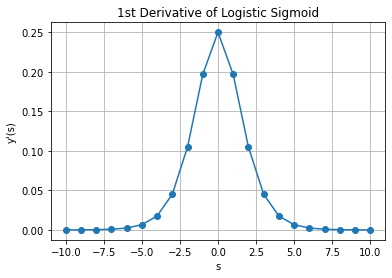

최대 도함수 값: 0.25
최대 도함수 값의 s: 0
최소 도함수 값: 4.5395807735907655e-05
최소 도함수 값의 s: 10


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 로지스틱 함수와 1차 도함수 정의
def logistic(s):
    return 1 / (1 + np.exp(-s))

def logistic_derivative(s):
    t = logistic(s)
    return t * (1 - t)

# 매개변수 범위와 증가값 설정
s_values = np.arange(-10, 11, 1)

# 도함수값 계산
derivative_values = logistic_derivative(s_values)

# 그래프 그리기
plt.plot(s_values, derivative_values, marker='o')
plt.title("1st Derivative of Logistic Sigmoid")
plt.xlabel("s")
plt.ylabel("y'(s)")
plt.grid()
plt.show()

# 값이 가장 큰 점과 작은 점 찾기
max_derivative_index = np.argmax(derivative_values)
min_derivative_index = np.argmin(derivative_values)

max_s = s_values[max_derivative_index]
min_s = s_values[min_derivative_index]

print("최대 도함수 값:", derivative_values[max_derivative_index])
print("최대 도함수 값의 s:", max_s)

print("최소 도함수 값:", derivative_values[min_derivative_index])
print("최소 도함수 값의 s:", min_s)


## 6 바이어스 노드가 없는 대신 임곗값 T를 가지는 퍼셉트론은 바이어스 노드가 있는 퍼셉트론가 같은지 답하시오. 답에 대한 이유를 설명하시오.

In [32]:
다르다.

바이어스 노드가 있는 퍼셉트론은 입력 데이터에 항상 1 값을 가지는 바이어스 노드를 포함함. 이는 변하지 않음.
임계값 T는 학습에 따라 변형 가능함.


SyntaxError: invalid syntax (<ipython-input-32-adb867aab423>, line 1)

## 7.

## x0=1, x1,x2가 input이고 w0=-0.5, w1=1,w2=1 인 퍼셉트론에 대해 답하시오.
## (1) w1과 w2의 값을 고정했을 때, w0이 어느 범위일 때 여전히 옳게 100% 분류하는가?
## (2) w0와 w2의 값을 고정했을 때, w1이 어느 범위일 때 여전히 100%옳게 분류하는가?

In [ ]:
(1)
output = w0*x0 + w1*x1 + w2*x2
output = (-1)*1 + 1*x1 + 1*x2
output = x1 + x2 - 1


==> 따라서 w0을 -1보다 큰 경우

(2)
output = w0*x0 + w1*x1 + w2*x2
output = (-0.5)*1 + 1*x1 + 1*x2
output = x1 + x2 - 0.5

=> w1을 0.5보다 커야 함.

In [ ]:
10

선형분리 불가능한 상황을 처리 할 수 있도록 [알고리즘 3-1]을 수정하시오

[알고리즘 3-1] 퍼셉트론 학습(배치버전)

입력 ; 훈련집합 X와 Y, 학습률 p
출력 : 최적 가중치 w

난수를 생성하여 초기화해 w를 설정한다.

repeat
    Y = 틀린샘플집합
    for j=1 to n
        y = t(w^T*xj)
        if (y!=yj) Y=Y u xj //틀린 샘플을 집합에 추가
    if Y != 틀린집합샘플
        for i=0 to d
            wi = wi + p(signma, Y에 속하는 xk) (y_k*x_ki)
until (Y = 틀린샘플집합)
w = w

In [ ]:
# 퍼셉트론의 학습 알고리즘에 마진을 도입하면 됨.

[알고리즘 3-1] 퍼셉트론 학습(배치버전) - 수정된 버전

입력: 훈련집합 X와 Y, 학습률 p, 마진 상수 m
출력: 최적 가중치 w

난수를 생성하여 초기화해 w를 설정한다.

repeat
    Y = 틀린샘플집합
    for j = 1 to n
        y = t(w^T * xj)
        if (y != yj) Y = Y u xj // 틀린 샘플을 집합에 추가
    if Y != 틀린샘플집합
        for i=0 to d
            wi = wi + p(signma, Y에 속하는 xk) (y_k*x_ki)
until (Y = 틀린샘플집합)

// 마진을 고려하여 w를 조정
for i = 0 to d
w_i = w_i - m * w_i

w = w